In [1]:
import ephem

In [ ]:
ephem.

# Unique field id extraction -- removes tiling to get prefix

# Get unique field ids

In [48]:
# Regex: capture everything before 'tiling' but include the hex numbers
pattern = r'^(.*hex\s+[^\s]+)\s+tiling'
# Extract the desired part
df['base_object'] = df['object'].str.extract(pattern, expand=False)
# print what else is leftover
df['object'][df['base_object'].isna()].values


array(['unguided', 'guided', 'guided', 'guided', 'guider test', 'ec0915',
       'ec0915', 'ec0914', 'ec0914', 'ec1014', 'ec1014', 'ec1014',
       'J0255.5-5406', 'J0255.5-5406', 'J0255.5-5406', 'J0255.5-5406',
       'J0255.5-5406', 'J0255.5-5406', 'J0255.5-5406', 'J0255.5-5406',
       'J0255.5-5406', 'J0255.5-5406', 'J0255.5-5406', 'J0255.5-5406',
       'J0255.5-5406', 'J0255.5-5406', 'J0255.5-5406', 'J0255.5-5406',
       'J0255.5-5406', 'J0255.5-5406', 'J0255.5-5406', 'J0255.5-5406',
       'J0255.5-5406', 'J0255.5-5406', 'J0255.5-5406', 'J0255.5-5406',
       'J0255.5-5406', 'J0255.5-5406', 'J0335.7-5403', 'J0335.7-5403',
       'J0335.7-5403', 'J0335.7-5403', 'J0335.7-5403', 'J0335.7-5403',
       'J0335.7-5403', 'J0335.7-5403', 'J0335.7-5403', 'J0335.7-5403',
       'J0335.7-5403', 'J0335.7-5403', 'J0335.7-5403', 'J0335.7-5403',
       'J0335.7-5403', 'J0335.7-5403', 'J0335.7-5403', 'J0335.7-5403',
       'J0335.7-5403', 'J0335.7-5403', 'J0335.7-5403', 'J0335.7-5403',
       

there is also probably some tiling associated with teh specific gw event: `DESGW: LIGO event G211117: # of 30`

In [49]:
# --------------- DESGW x of 30 is actually its own tile ------------------- #
# Extract all that base_objects that are nas and are a DESGW event
# only update base_object that matches this pattern w/ mask
# mask = df['object'].str.contains('DESGW:', case=False, na=False)

# pattern = r'^([^:]*:[^:]*)'  # match everything before the second colon
# df.loc[mask, 'base_object'] = df.loc[mask, 'object'].str.extract(pattern, expand=False)

# ------------------------------------------------------------------------- #


The rest I'll treat as individual fields and double check this in (ra, dec) values later

In [50]:
mask = df['base_object'].isna()
df['base_object'] = df['base_object'].fillna(df['object'])

In [51]:
unique_fields = np.unique(df['base_object'])

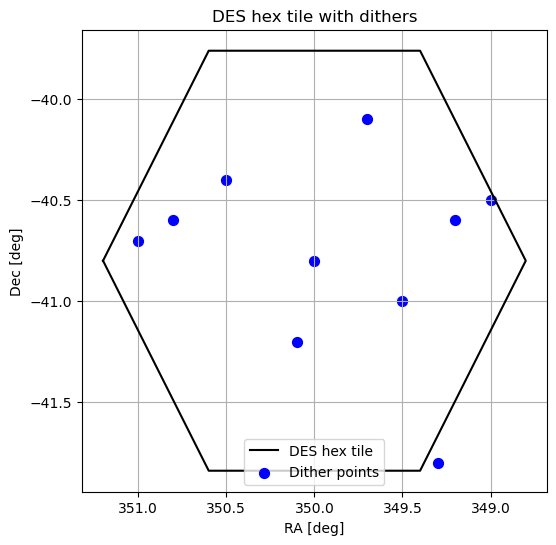

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Example dither points (replace with your actual RA/Dec)
ra = np.array([349.0, 349.2, 349.5, 350.0, 350.1, 350.5, 350.8, 351.0, 349.3, 349.7])
dec = np.array([-40.5, -40.6, -41.0, -40.8, -41.2, -40.4, -40.6, -40.7, -41.8, -40.1])

# Hex tile parameters (approximate)
hex_center = (350.0, -40.8)  # RA/Dec center of the hex
hex_radius = 1.2  # degrees, approx size of DES hex

# Create hexagon outline
theta = np.linspace(0, 2*np.pi, 7)
hex_x = hex_center[0] + hex_radius * np.cos(theta)
hex_y = hex_center[1] + hex_radius * np.sin(theta)

plt.figure(figsize=(6,6))
plt.plot(hex_x, hex_y, 'k-', lw=1.5, label='DES hex tile')  # hex outline
plt.scatter(ra, dec, color='blue', s=50, label='Dither points')
plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]')
plt.title('DES hex tile with dithers')
plt.gca().invert_xaxis()  # DES convention: RA increases to the left
plt.grid(True)
plt.legend()
plt.show()


In [53]:
dith_areas = []
error_fields = []
for field in unique_fields:
    field_df = df[df['base_object'] == field]
    dith_width = field_df['ra'].max() - field_df['ra'].min()
    dith_height = field_df['dec'].max() - field_df['dec'].min()
    dith_a = dith_width * dith_height
    if dith_a > 9:
        error_fields.append(field)
    else:
        dith_areas.append(dith_a)
    
    # plt.scatter(field_df['ra'], field_df['dec'])
    # plt.title(field)
    # plt.show();

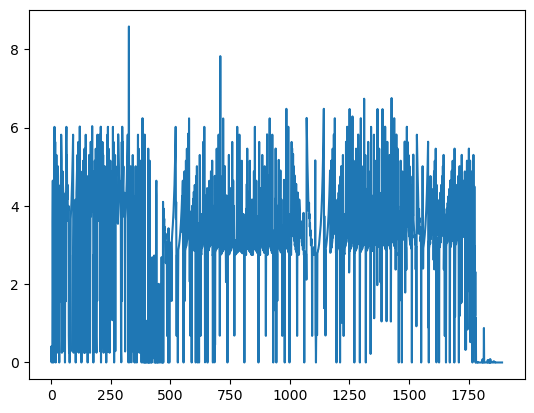

In [54]:
plt.plot(dith_areas)

In [55]:
error_fields

['DES survey hex -12-491',
 'DES survey hex -15-653',
 'DES survey hex -16-582',
 'DES survey hex -184-552',
 'DES survey hex -2-450',
 'DES survey hex -2-542',
 'DES survey hex -287-511',
 'DES survey hex -302-572',
 'DES survey hex -5-633',
 'DES survey hex -7-471',
 'DES survey hex -8-562',
 'DES survey hex -9-379',
 'DES survey hex 10-390',
 'DES survey hex 10-501',
 'DES survey hex 106-562',
 'DES survey hex 11-592',
 'DES survey hex 133-308',
 'DES survey hex 2-430',
 'DES survey hex 3-613',
 'DES survey hex 3-65',
 'DES survey hex 307+47',
 'DES survey hex 4+16',
 'DES survey hex 4+37',
 'DES survey hex 4-24',
 'DES survey hex 4-4',
 'DES survey hex 4-45',
 'DES survey hex 4-521',
 'DES survey hex 485-166',
 'DES survey hex 6-410',
 'DES survey hex 698-501',
 'DES survey hex 748-501',
 'DES survey hex 919-491']

Check out fields which have very large dithering areas

In [56]:
mask = df['base_object'].isin(error_fields)

In [57]:
extracted_rows = df[mask]

In [58]:
one_tiling = extracted_rows[extracted_rows['base_object'].str.contains(error_fields[-1])]

In [59]:
one_tiling.object.values

array(['DES survey hex 919-491 tiling 2',
       'DES survey hex 919-491 tiling 1',
       'DES survey hex 919-491 tiling 2',
       'DES survey hex 919-491 tiling 4',
       'DES survey hex 919-491 tiling 3',
       'DES survey hex 919-491 tiling 3',
       'DES survey hex 919-491 tiling 3',
       'DES survey hex 919-491 tiling 4',
       'DES survey hex 919-491 tiling 4',
       'DES survey hex 919-491 tiling 1',
       'DES survey hex 919-491 tiling 1',
       'DES survey hex 919-491 tiling 1',
       'DES survey hex 919-491 tiling 2',
       'DES survey hex 919-491 tiling 4',
       'DES survey hex 919-491 tiling 3',
       'DES survey hex 919-491 tiling 2',
       'DES survey hex 919-491 tiling 7',
       'DES survey hex 919-491 tiling 5',
       'DES survey hex 919-491 tiling 5',
       'DES survey hex 919-491 tiling 5',
       'DES survey hex 919-491 tiling 5',
       'DES survey hex 919-491 tiling 5',
       'DES survey hex 919-491 tiling 6',
       'DES survey hex 919-491 til

In [62]:
[(obj, ra, dec) for obj, ra, dec in zip(one_tiling.object, one_tiling.ra, one_tiling.dec)]

[('DES survey hex 919-491 tiling 2', 90.775454, -48.621721),
 ('DES survey hex 919-491 tiling 1', 91.935208, -49.095554),
 ('DES survey hex 919-491 tiling 2', 90.775333, -48.622165),
 ('DES survey hex 919-491 tiling 4', 92.007329, -48.317776),
 ('DES survey hex 919-491 tiling 3', 91.0917, -49.92411),
 ('DES survey hex 919-491 tiling 3', 91.091625, -49.923999),
 ('DES survey hex 919-491 tiling 3', 91.0917, -49.923471),
 ('DES survey hex 919-491 tiling 4', 92.007329, -48.317637),
 ('DES survey hex 919-491 tiling 4', 92.007283, -48.317249),
 ('DES survey hex 919-491 tiling 1', 91.935242, -49.095443),
 ('DES survey hex 919-491 tiling 1', 91.935283, -49.095026),
 ('DES survey hex 919-491 tiling 1', 91.935283, -49.095026),
 ('DES survey hex 919-491 tiling 2', 90.775408, -48.621332),
 ('DES survey hex 919-491 tiling 4', 92.007658, -48.317915),
 ('DES survey hex 919-491 tiling 3', 91.091371, -49.924471),
 ('DES survey hex 919-491 tiling 2', 90.775454, -48.62111),
 ('DES survey hex 919-491 tili

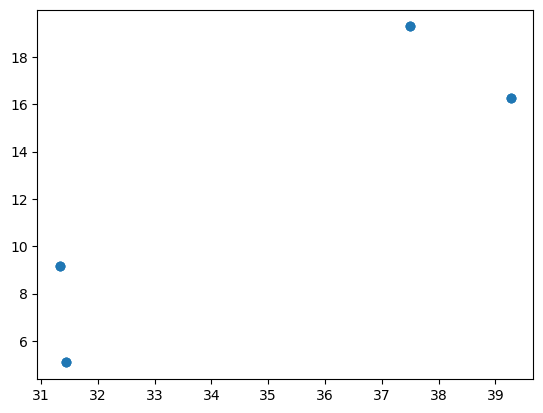

In [39]:
plt.scatter(one_tiling.ra, one_tiling.dec)